In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img=cv2.imread('img1.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [ ]:
img

array([[[176, 177, 179],
        [182, 183, 185],
        [181, 181, 183],
        ...,
        [ 37,  43,  55],
        [ 38,  44,  56],
        [ 33,  39,  51]],

       [[179, 180, 182],
        [179, 179, 181],
        [179, 179, 179],
        ...,
        [ 35,  41,  53],
        [ 37,  43,  55],
        [ 34,  40,  52]],

       [[189, 190, 195],
        [185, 186, 190],
        [180, 180, 182],
        ...,
        [ 37,  43,  55],
        [ 35,  41,  53],
        [ 29,  35,  47]],

       ...,

       [[ 51,  62,  82],
        [ 49,  60,  78],
        [ 50,  58,  77],
        ...,
        [ 53,  68,  87],
        [ 52,  67,  86],
        [ 56,  71,  90]],

       [[ 51,  64,  83],
        [ 51,  62,  80],
        [ 51,  62,  80],
        ...,
        [ 51,  66,  85],
        [ 54,  69,  88],
        [ 63,  78,  97]],

       [[ 61,  74,  93],
        [ 58,  71,  90],
        [ 53,  64,  82],
        ...,
        [ 55,  68,  87],
        [ 54,  67,  86],
        [ 58,  71,  90]]

In [ ]:
#cropping
y,h,x,w= 700, 1000, 500, 1390
crop_img = img[y:y+h, x:x+w]

In [ ]:
#affine
row , col , _ = img.shape
print(row,col)
pts1 = np.float32([[20,30],[200,90],[100,250]])
pts2 = np.float32([[0,0],[300,90],[10,400]])
matrix = cv2.getAffineTransform(pts1,pts2)
affine_img = cv2.warpAffine(img,matrix,(col,row))

2848 4288


In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#logarithmic transformation
c = 255/np.log(1 + np.max(gray_img))
log_image = c * np.log(gray_img + 1)
log_image = np.array(log_image, dtype = np.uint8)
#gamma transformation
gamma = 2.2
gamma_corrected = np.power(img / 255.0, gamma) *255
gamma_corrected = np.uint8(gamma_corrected)
#negative transformation
neagtive_img = 255 - img

<ipython-input-72-c28c294f84a0>:4: RuntimeWarning: divide by zero encountered in log
  log_image = c * np.log(gray_img + 1)
<ipython-input-72-c28c294f84a0>:5: RuntimeWarning: invalid value encountered in cast
  log_image = np.array(log_image, dtype = np.uint8)


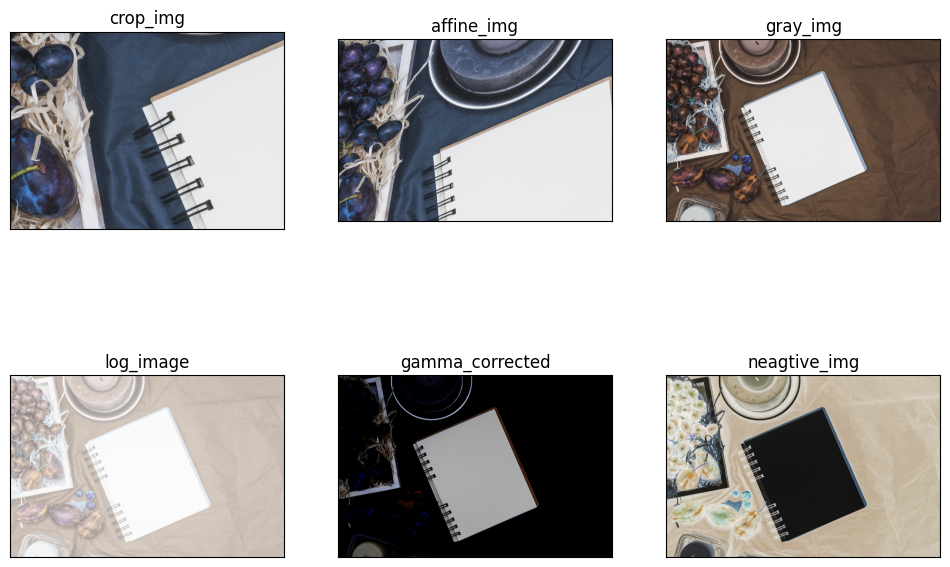

In [ ]:
titles = ['crop_img','affine_img','gray_img','log_image','gamma_corrected','neagtive_img']
images = [crop_img , affine_img ,gray_img, log_image , gamma_corrected , neagtive_img]
#Plots
plt.figure(figsize=(12,8))
for i in range(len(titles)):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

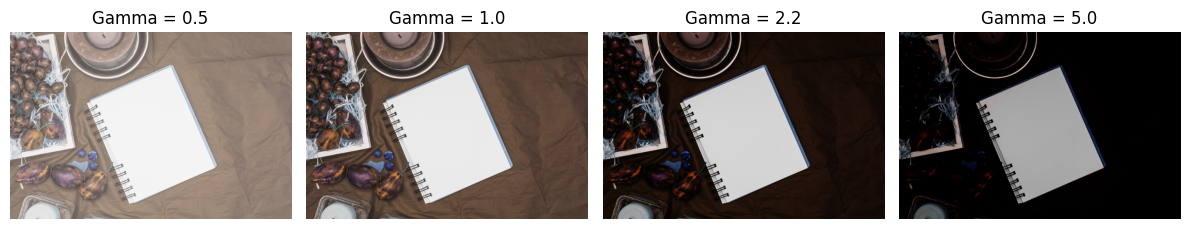

In [ ]:
gamma_values = [0.5, 1.0, 2.2, 5.0]
plt.figure(figsize=(12, 8))
for i, gamma in enumerate(gamma_values):
        # Normalize and apply gamma correction
        gamma_corrected = np.power(img / 255.0, gamma) * 255
        # Convert back to uint8
        gamma_corrected = np.uint8(gamma_corrected)
        plt.subplot(1, 4, i + 1)
        plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
        plt.title(f'Gamma = {gamma}')
        plt.axis("off")
plt.tight_layout()
plt.show()
